## 용어
- 로짓(logit): (0~1이 아니라)±∞의 범위에서 어떤 클래스에 속할 확률을 결정하는 함수(유의어: 로그 오즈)
- 오즈(odds): '실패(0)'에 대한 '성공(1)'의 비율
- 로그 오즈(log odds): 변환 모델(선형)의 응답변수. 이 값을 통해 확률을 구한다.

## 로지스틱 회귀(Logistic Regression)
- 데이터 위주의 접근 방식이라기보다, 구조화된 모델의 접근 방식
- 빠른 계산 속도 및 새로운 데이터에 대한 빠른 점수 산정 덕분에 다양한 분야에서 널리 사용

In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

## 로짓(logit)

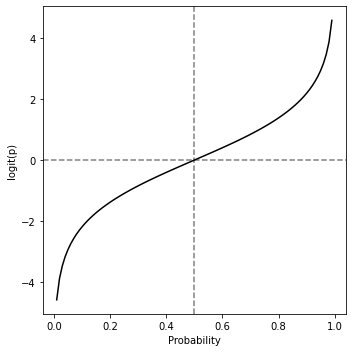

In [56]:
p = np.arange(0.01, 1, 0.01)
df = pd.DataFrame({
    'p': p,
    'logit': np.log(p / (1 - p)),
    'odds': p / (1 - p),
})

fig, ax = plt.subplots(figsize=(5, 5))
ax.axhline(0, color='grey', linestyle='--')
ax.axvline(0.5, color='grey', linestyle='--')
ax.plot(df['p'], df['logit'], color='black')
ax.set_xlabel('Probability')
ax.set_ylabel('logit(p)')

plt.tight_layout()
plt.show()

## 로지스틱 회귀와 GLM
- 회귀방정식에 응답변수는 ±∞의 범위 로짓(로그 오즈 값)이지만 실제 관찰한 데이터는 로짓이 아닌 이진 출력값
- 이 회귀방정식을 위해서는 특별한 확률 기법이 필요
- 로지스틱 회귀는 선형회귀를 확장한 일반화선형모형(GLM)의 특별한 사례

In [14]:
loan_data = pd.read_csv('../../data/loan_data.csv', index_col=0)

In [80]:
loan_data['borrower_score']

1        0.65
2        0.80
3        0.60
4        0.50
5        0.55
         ... 
45338    0.35
45339    0.50
45340    0.55
45341    0.65
45342    0.50
Name: borrower_score, Length: 45342, dtype: float64

In [36]:
features = ['payment_inc_ratio', 'purpose_', 'home_', 'emp_len_', 'borrower_score']
label = 'outcome'

X = pd.get_dummies(loan_data[features], prefix='', prefix_sep='', 
                   drop_first=True)
y = loan_data[label].replace({'default':0, 'paid off':1})

logit_reg = LogisticRegression(penalty='l2', # 정규화 방법
                               C=1e42,       # 정규화 강도(C값이 낮을수록 정규화가 강화, 정규화 없이 피팅하려면 매우 큰 값으로 설정)
                              solver='liblinear') 
logit_reg.fit(X, y)

coef_df = pd.DataFrame({'coeff': logit_reg.coef_[0]}, 
             index=X.columns)
coef_df.loc['intercept'] = logit_reg.intercept_
coef_df

,coeff
payment_inc_ratio,-0.079728
borrower_score,4.611037
debt_consolidation,-0.249342
home_improvement,-0.407614
major_purchase,-0.229376
medical,-0.510087
other,-0.620534
small_business,-1.215662
OWN,-0.048453
RENT,-0.157355


### 로지스틱 회귀와 예측값(Predicted Values from Logistic Regression)

In [51]:
# 로그 오즈에 관한 통계량
pred = pd.DataFrame(logit_reg.predict_log_proba(X),
                    columns=['default', 'paid off'])
pred.describe()

,default,paid off
count,45342.000000,45342.000000
mean,-0.757850,-0.760423
std,0.378032,0.390419
min,-2.768873,-3.538865
25%,-0.985728,-0.977164
50%,-0.697366,-0.688946
75%,-0.472209,-0.467076
max,-0.029476,-0.064787


In [53]:
# 예측 확률에 대한 통계랑
pred = pd.DataFrame(logit_reg.predict_proba(X),
                    columns=['default', 'paid off'])
pred.describe()

,default,paid off
count,45342.000000,45342.000000
mean,0.500001,0.499999
std,0.167336,0.167336
min,0.062733,0.029046
25%,0.373167,0.376377
50%,0.497895,0.502105
75%,0.623623,0.626833
max,0.970954,0.937267


## 계수와 오즈비 해석

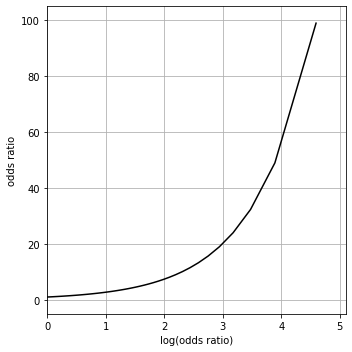

In [60]:
# 오즈비가 1보다 클경우, 오즈비와 로그 오즈비 사이의 관계
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(df['logit'], df['odds'], color='black')
ax.set_xlabel('log(odds ratio)')
ax.set_ylabel('odds ratio')
ax.set_xlim(0, 5.1)
ax.set_ylim(-5, 105)
ax.grid()

plt.tight_layout()
plt.show()